# Clusterization

## K-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y= make_blobs(n_samples=210, centers=3, n_features=2, cluster_std=0.5, shuffle=True,random_state=0)

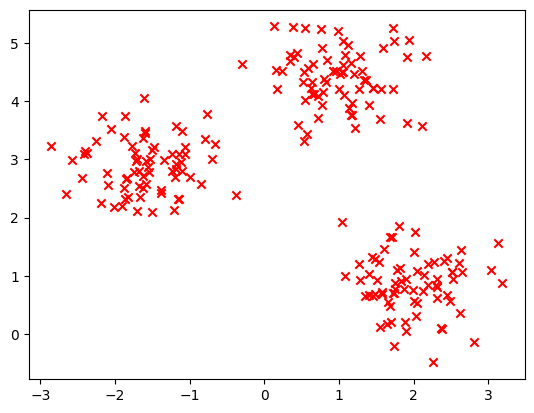

In [2]:
plt.scatter(X[:,0], X[:,1], c='red', marker='x')
plt.show()

In [3]:
# Tworzenie obiektu KMeans z wybranymi parametrami
km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
)

# Dopasowanie modelu do danych
_ = km.fit(X)

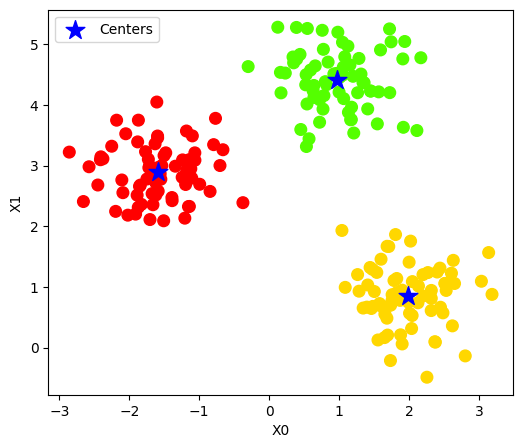

In [4]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [5]:
def generate_data_and_clusterize(centers=3, n_clusters=3, init='random'):
  X, y= make_blobs(n_samples=210, centers=centers, n_features=2, cluster_std=0.5, shuffle=True,random_state=0)
  km = KMeans(
    n_clusters=n_clusters,
    init=init,
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
  )

  _ = km.fit(X)

  return km, X, y

## K-means for same amount of clusters

```python

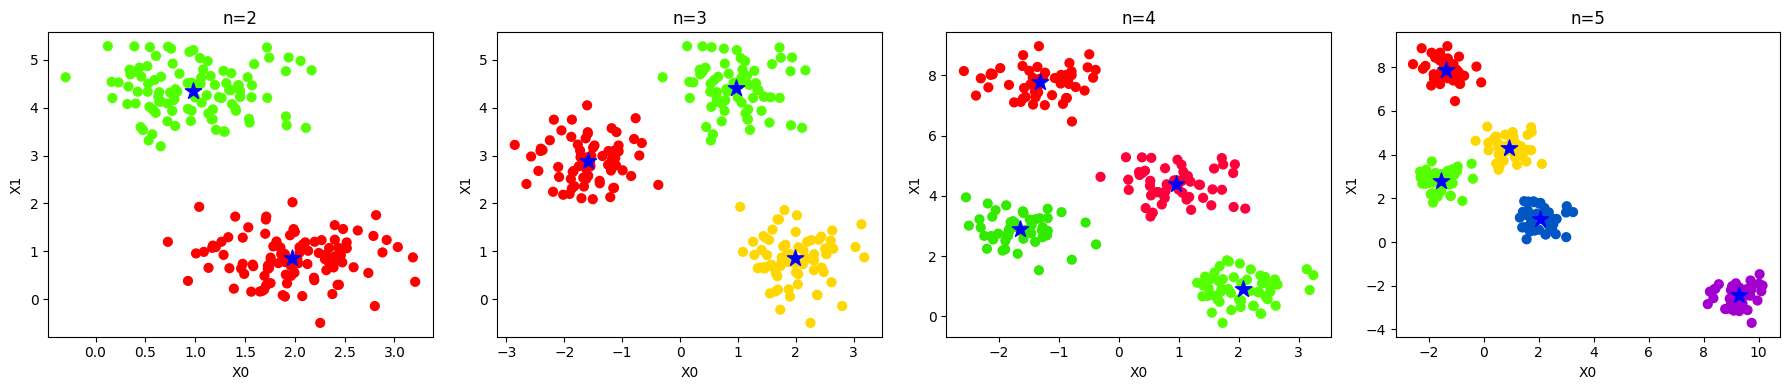

In [6]:
n = 4
fig, axes = plt.subplots(1, n, figsize=(18, 4))

for i in range(n):
  n_clusters = i + 2
  knn, X, y = generate_data_and_clusterize(n_clusters, n_clusters)
  axes[i].scatter(X[:, 0], X[:, 1], c=knn.labels_, cmap=plt.cm.prism, s=40)
  axes[i].scatter(knn.cluster_centers_[:, 0], knn.cluster_centers_[:, 1], marker='*', s=150, color='blue')
  axes[i].set_title(f'n={n_clusters}')
  axes[i].set_xlabel('X0')
  axes[i].set_ylabel('X1')

plt.tight_layout()
plt.show()

## K-means for different amount of clusters

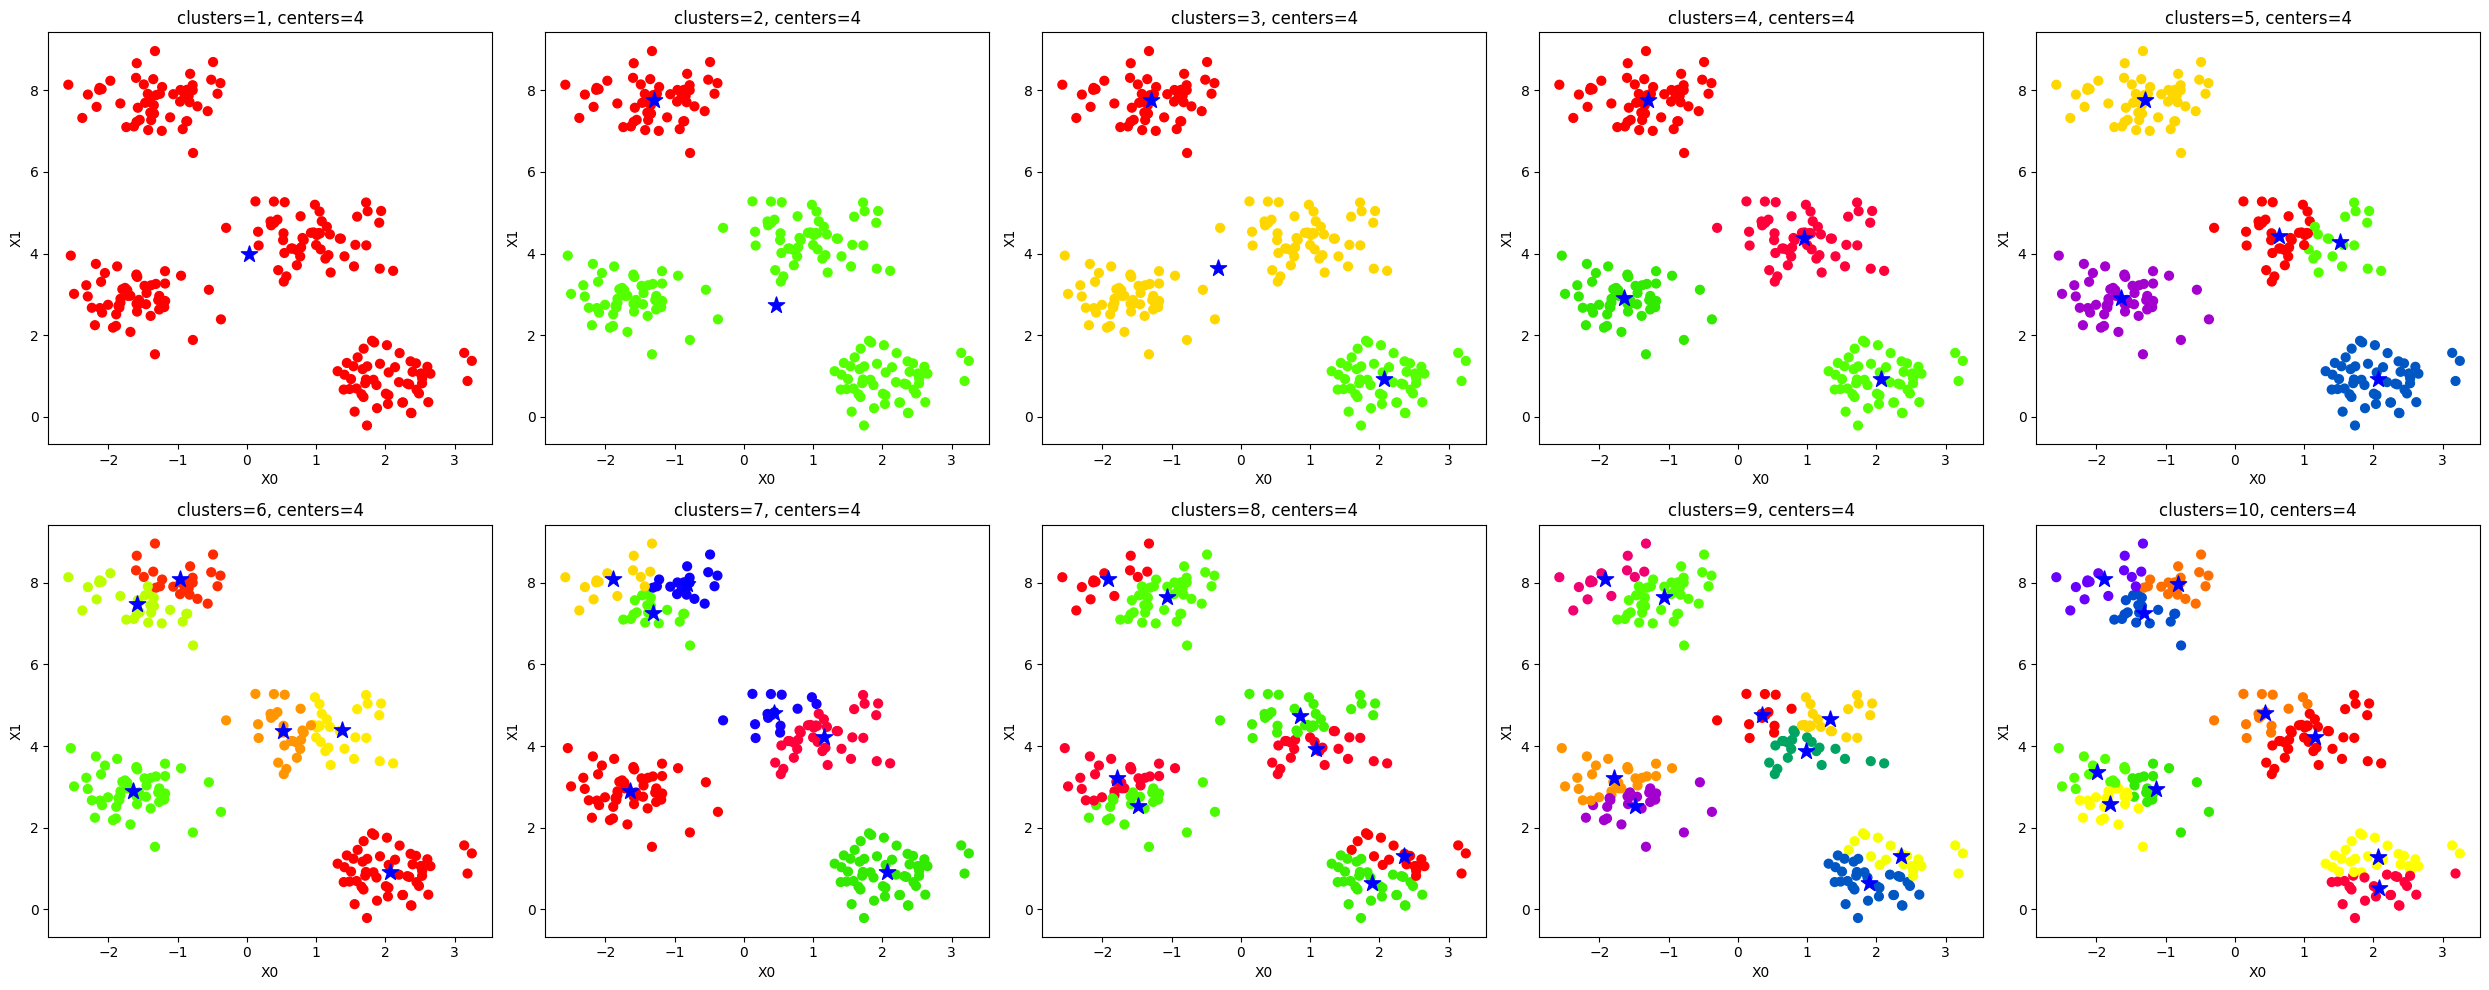

In [7]:
n = 10
col = 5
row = n // col + (n % col > 0)
fig, axes = plt.subplots(row, col, figsize=(col * 5, row * 5))
axes = axes.flatten()  

n_centers = 4
clusters = range(1, n+1)
inertias = []

for i, n_clusters in enumerate(clusters):
    knn, X, y = generate_data_and_clusterize(n_centers, n_clusters)
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=knn.labels_, cmap=plt.cm.prism, s=40)
    ax.scatter(knn.cluster_centers_[:, 0], knn.cluster_centers_[:, 1], marker='*', s=150, color='blue')
    ax.set_title(f'clusters={n_clusters}, centers={n_centers}')
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    inertias.append(knn.inertia_)

# Ukryj nieużywane osie (jeśli są)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Inertia plot and elbow method

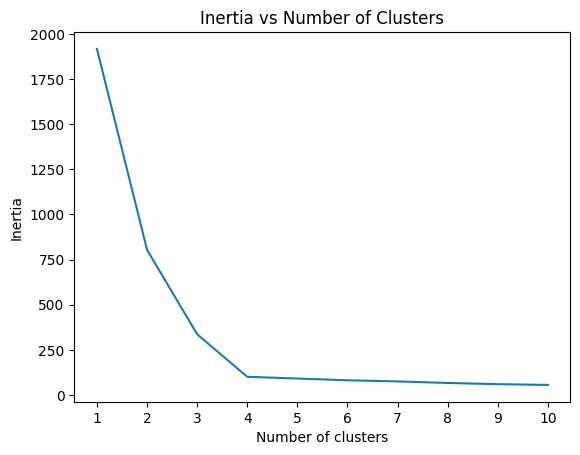

In [8]:
plt.plot(clusters, inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.xticks(clusters)
plt.show()

In [9]:
print("Optimal number of clusters based on inertia: 4.");

Optimal number of clusters based on inertia: 4.


## K-means++

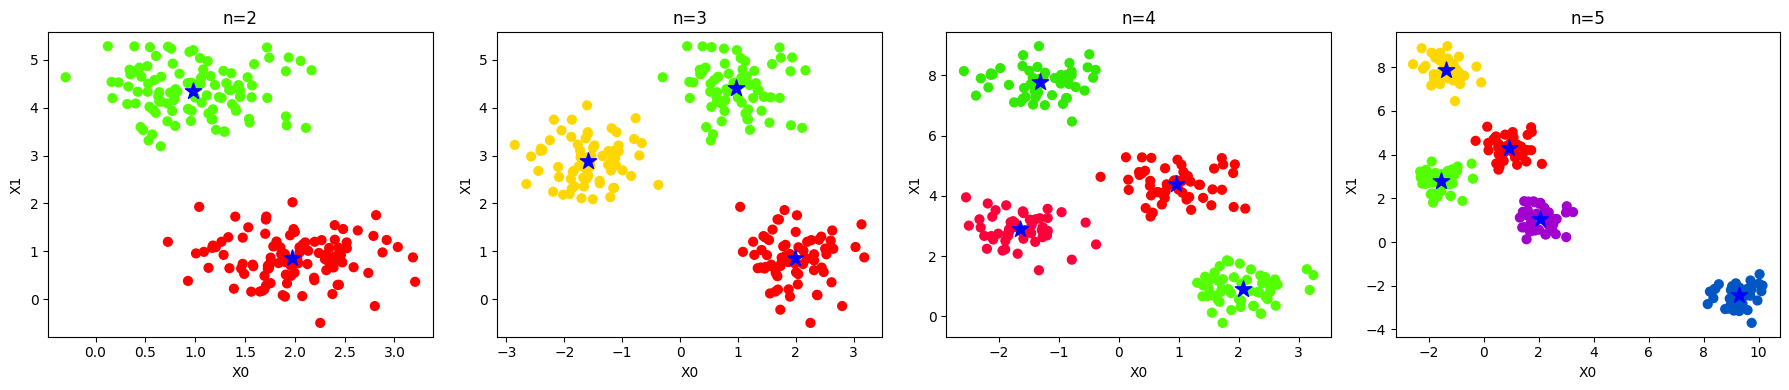

In [10]:
n = 4
fig, axes = plt.subplots(1, n, figsize=(18, 4))

for i in range(n):
  n_clusters = i + 2
  knn, X, y = generate_data_and_clusterize(n_clusters, n_clusters, 'k-means++')
  axes[i].scatter(X[:, 0], X[:, 1], c=knn.labels_, cmap=plt.cm.prism, s=40)
  axes[i].scatter(knn.cluster_centers_[:, 0], knn.cluster_centers_[:, 1], marker='*', s=150, color='blue')
  axes[i].set_title(f'n={n_clusters}')
  axes[i].set_xlabel('X0')
  axes[i].set_ylabel('X1')

plt.tight_layout()
plt.show()

/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


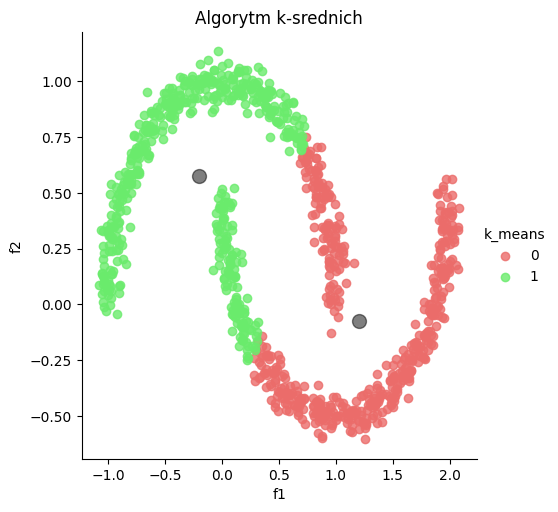

In [11]:
from sklearn.datasets import make_moons
import seaborn as sns

x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns=['f1', 'f2'])
km = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
)
y_km = km.fit_predict(X_moon)

X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue='k_means', palette=['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', s=100, alpha=0.5)
plt.show()

## Silhouette analysis

/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5804620679044765
For n_clusters = 6 The average silhouette_score is : 0.49664791108169587


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encount

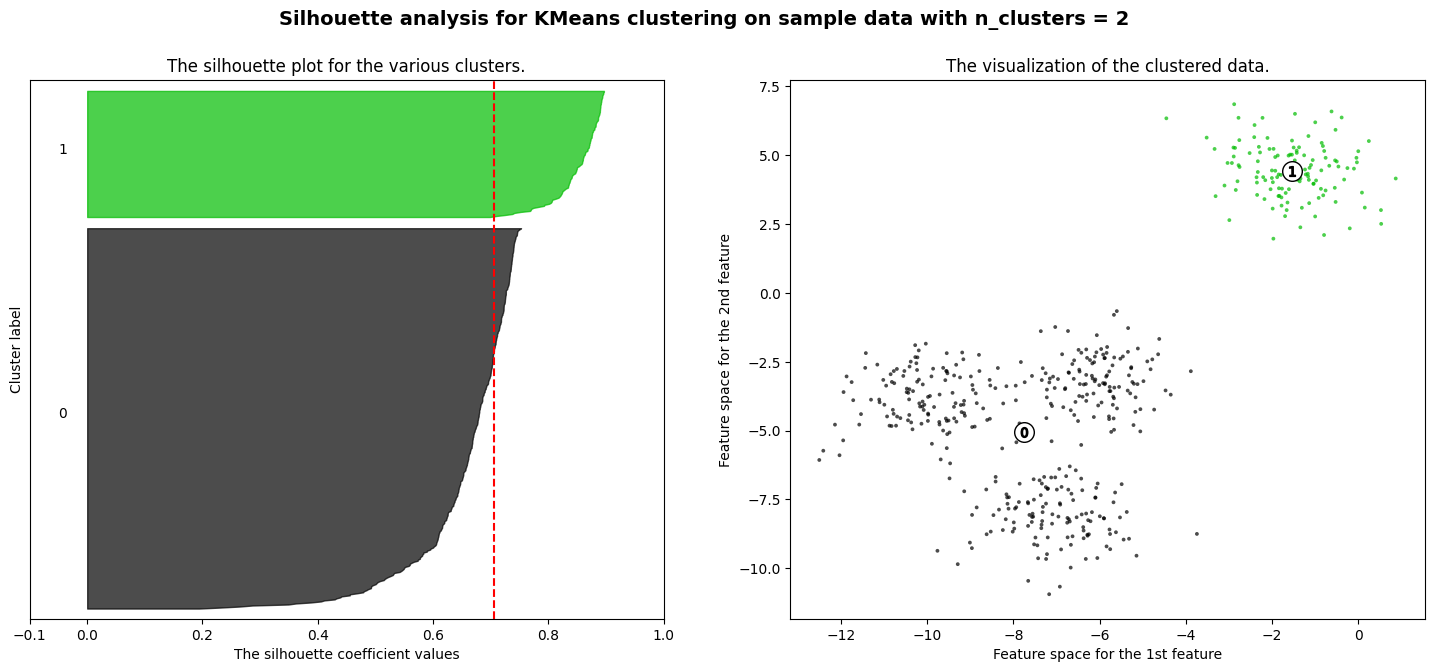

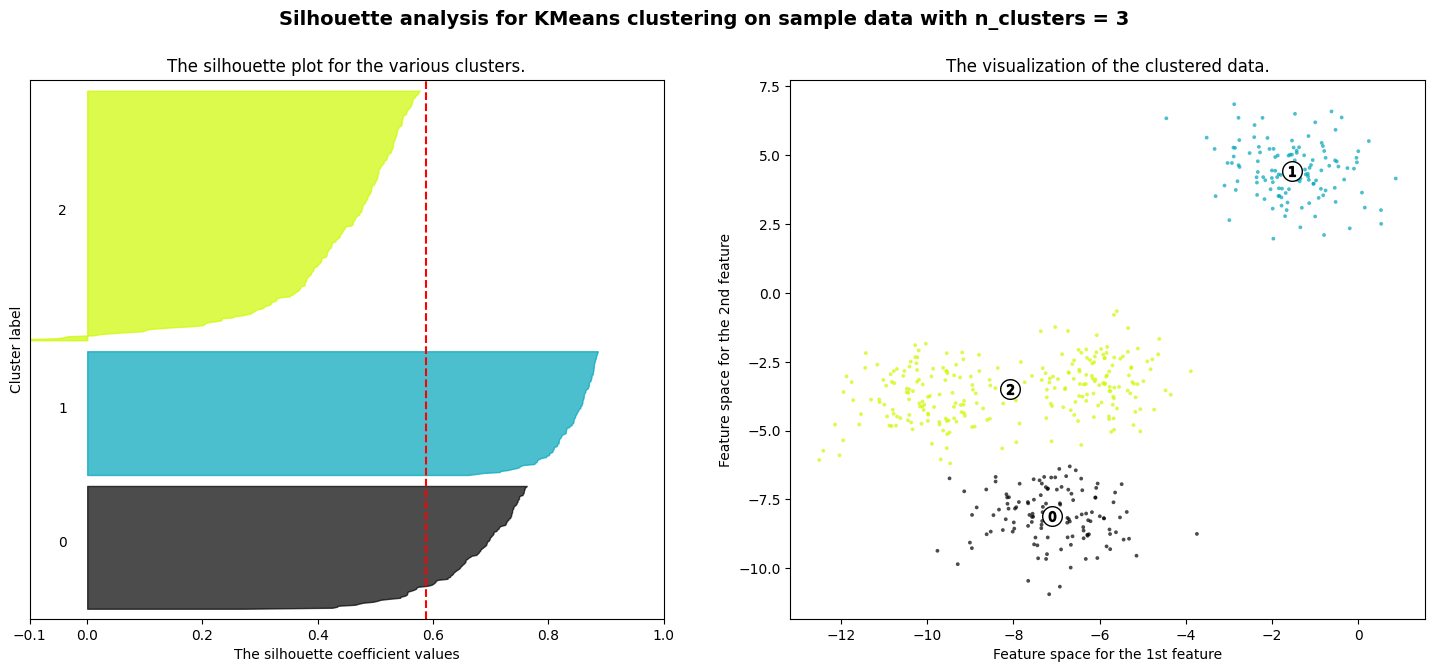

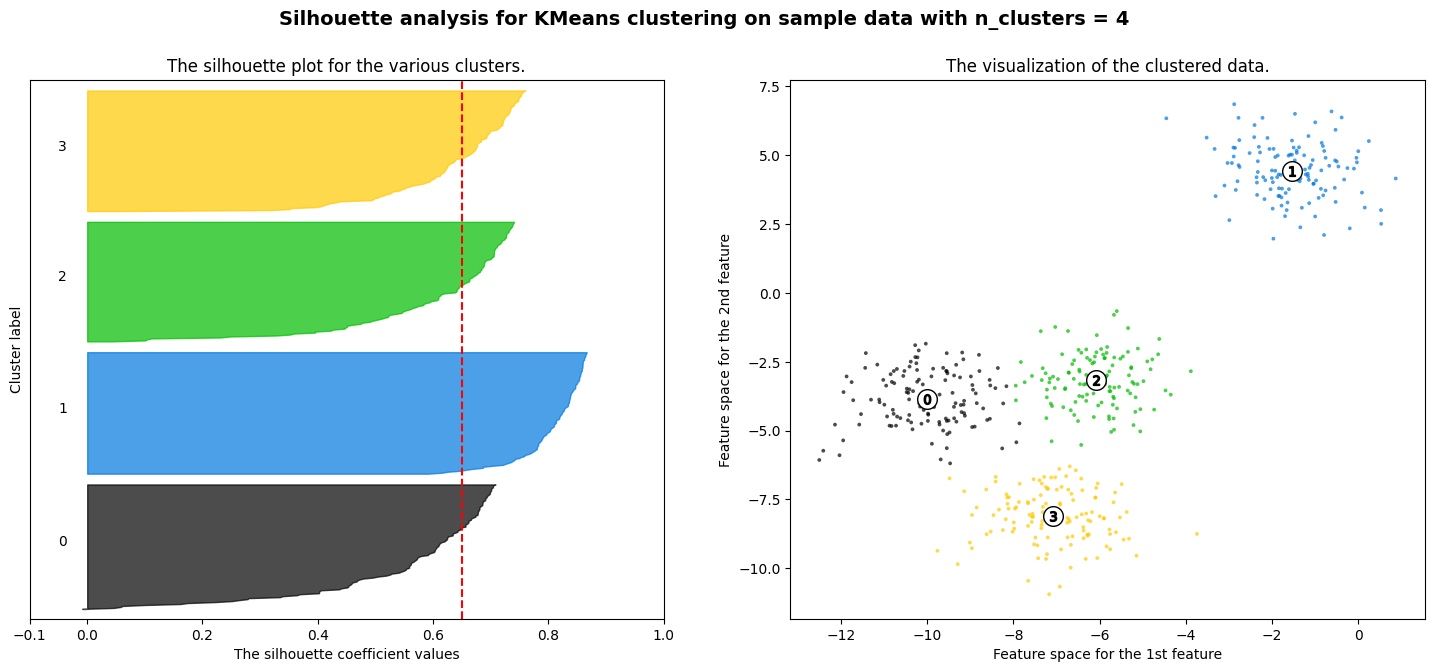

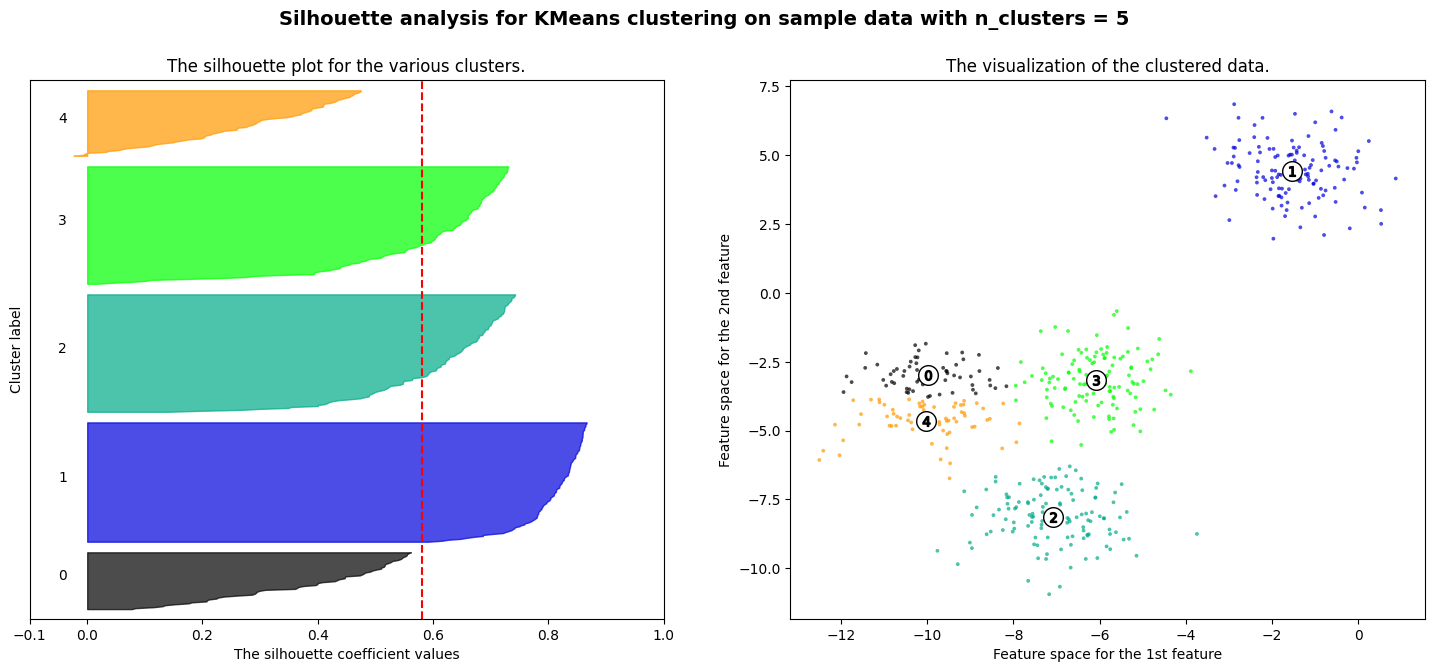

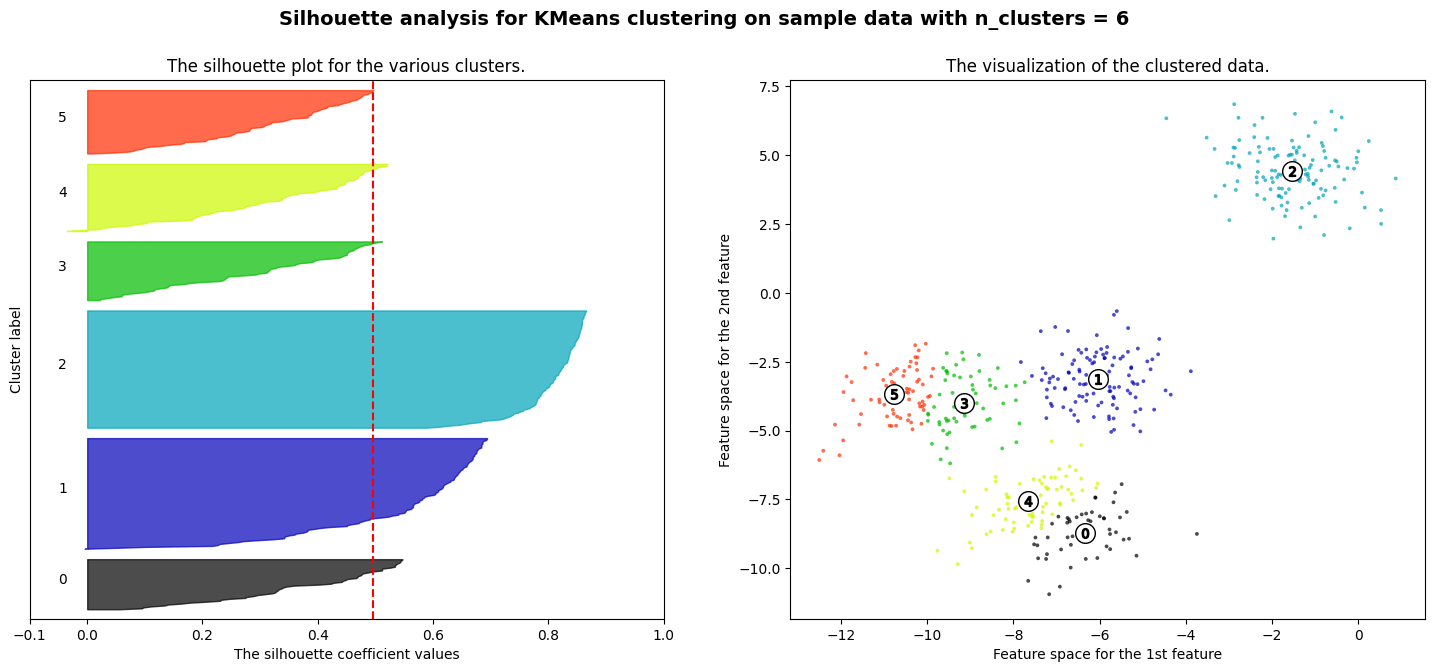

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
 
 
# Generowanie danych
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
# Wybór liczby skupień celem porównania 
range_n_clusters = [2, 3, 4, 5, 6]
 
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 
    # Proszę stworzyć model klasy KMeans z liczbą klastrówn_clusters oraz losową liczbą wstępnych centroidów random_state=10
 
    clusterer = KMeans(
    n_clusters=n_clusters,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=10
  )
   # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(X)
 
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Wyznacz współczynnik profilu dla każdego przypadku wykorzystując funkcję silhouette_samples
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
 
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
 
        ith_cluster_silhouette_values.sort()
 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
 
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
 
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
 
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
 
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
 
plt.show()

In [13]:
import os
path = os.getcwd() + '/shopping_data.csv'
customer_data = pd.read_csv(path)  
 
data = customer_data.iloc[:, 3:5].values

## Agglomerative clustering

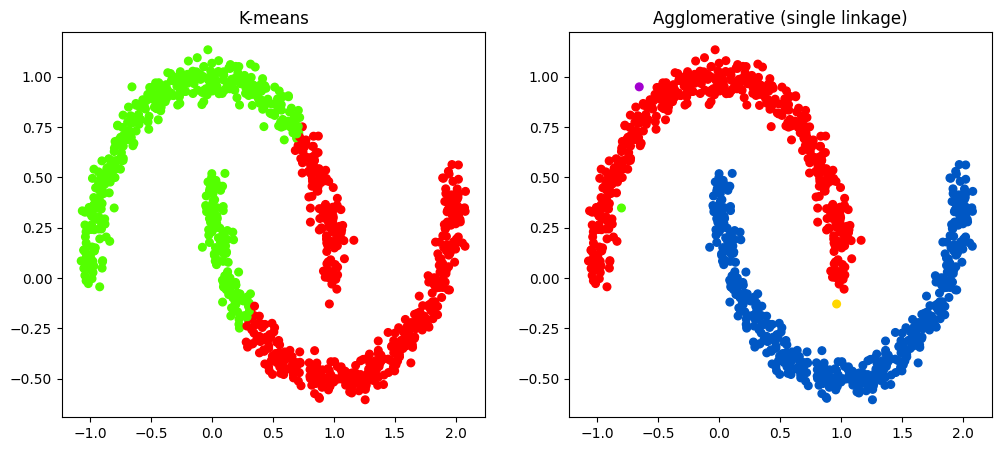

In [14]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, linkage='single')
y_agg = agg.fit_predict(X_moon[['f1', 'f2']])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X_moon['f1'], X_moon['f2'], c=X_moon['k_means'], cmap=plt.cm.prism, s=30)
axes[0].set_title('K-means')
axes[1].scatter(X_moon['f1'], X_moon['f2'], c=y_agg, cmap=plt.cm.prism, s=30)
axes[1].set_title('Agglomerative (single linkage)')
plt.show()

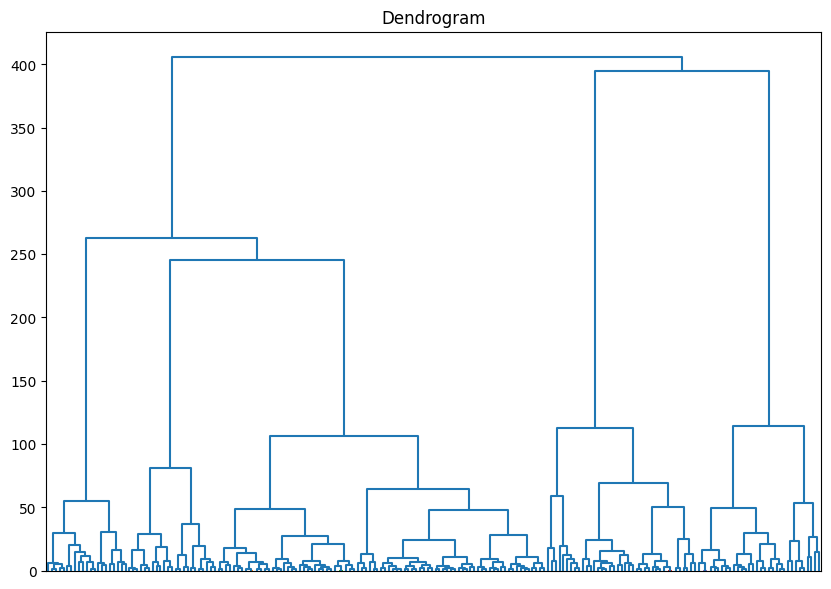

In [15]:
import scipy.cluster.hierarchy as ch
 
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram") 
Z = ch.linkage(data, method='ward')
ch.dendrogram(Z, leaf_rotation=90., leaf_font_size=12., color_threshold=0.5)
plt.xticks([])
plt.show()


## DBSCAN

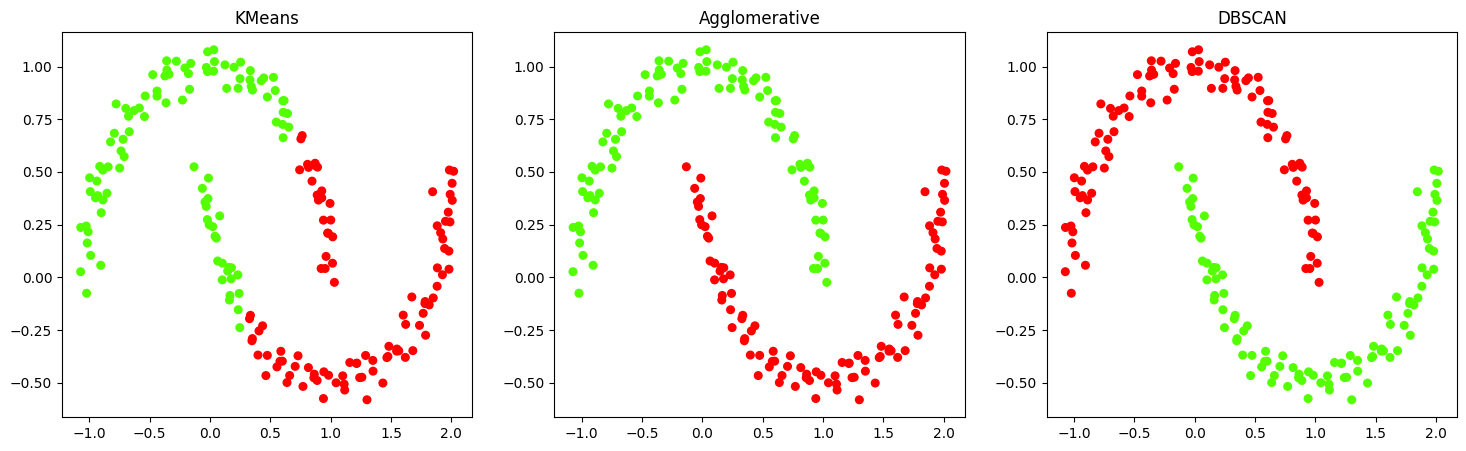

In [16]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import DBSCAN
x, y = make_moons(n_samples=200, noise=.05, random_state=0)
# plt.scatter(x[:,0],x[:,1])
# plt.show()

# KMeans clustering
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=42)
y_km = km.fit_predict(x)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
y_agg = agg.fit_predict(x)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_db = dbscan.fit_predict(x)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(x[:, 0], x[:, 1], c=y_km, cmap=plt.cm.prism, s=30)
axes[0].set_title('KMeans')
axes[1].scatter(x[:, 0], x[:, 1], c=y_agg, cmap=plt.cm.prism, s=30)
axes[1].set_title('Agglomerative')
axes[2].scatter(x[:, 0], x[:, 1], c=y_db, cmap=plt.cm.prism, s=30)
axes[2].set_title('DBSCAN')
plt.show()